# Random Forest Classifier

In [15]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [17]:
merged_data = pd.read_csv('merged_data.csv')
merged_data.drop(['Unnamed: 0' , 'id'], axis=1, inplace = True)
merged_data.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,1,1,13,0,460,3,4,3,1,5,...,4,4,5,5,25,18.0,0,0,0,1
1,1,0,25,1,235,3,2,3,3,1,...,3,1,4,1,1,6.0,0,1,0,0
2,0,1,26,1,1142,2,2,2,2,5,...,4,4,4,5,0,0.0,1,1,0,0
3,0,1,25,1,562,2,5,5,5,2,...,3,1,4,2,11,9.0,0,1,0,0
4,1,1,61,1,214,3,3,3,3,4,...,4,3,3,3,0,0.0,1,1,0,0


In [19]:
merged_data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
Business                               0
Eco                                    0
Eco Plus        

## Random Forest Benchmark Model

In [22]:
train_data, test_data = train_test_split(merged_data, test_size=0.3, random_state=42)

In [24]:
# Separate features and target variable for training data
x_train = train_data.drop(["satisfaction"], axis=1)
y_train = train_data.satisfaction.values

# Separate features and target variable for testing data
x_test = test_data.drop(["satisfaction"], axis=1)
y_test = test_data.satisfaction.values

In [26]:
classifier_RF = RandomForestClassifier(random_state = 42)

classifier_RF.fit(x_train, y_train)
classifier_RF.score(x_test, y_test)

0.9613489374807515

In [28]:
#checking for overfitting
classifier_RF.score(x_train, y_train)

0.9999890008359364

In [30]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = classifier_RF.predict(x_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9613489374807515
F1 Score: 0.9614365084739336


In [32]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    # When annot is set to True, it adds text annotations to each cell of the heatmap.
    sns.heatmap(cf,annot=True,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.9999890008359364
Test score 0.9613489374807515
Train Confusion matrix


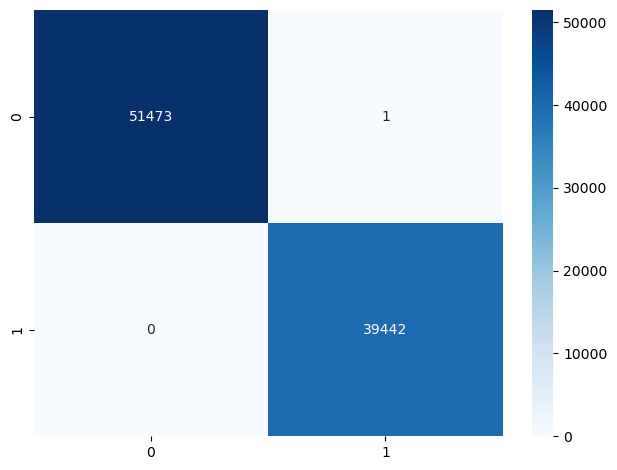

Test Confusion matrix


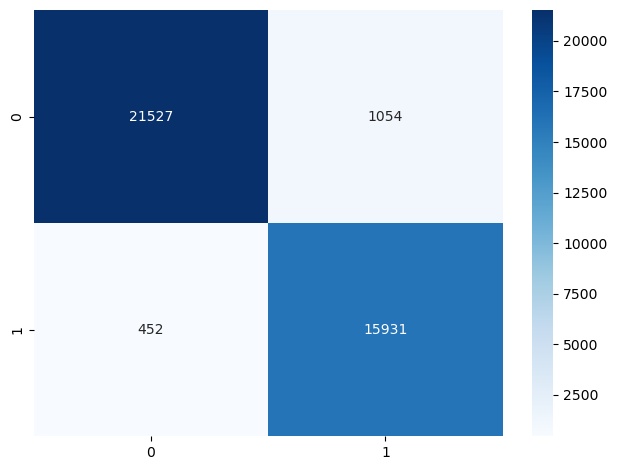

In [34]:
classifier_RF.fit(x_train,y_train)
y_train_pred = classifier_RF.predict(x_train)
y_test_pred = classifier_RF.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

### The training matrix score shows only 1 error which is a sign of overfitting. The training score is rounded to 100% accurate which is a sign of overfitting


# Preprocessing Random Forest

In [38]:
train_data, test_data = train_test_split(merged_data, test_size=0.3, random_state=42)
# Separate features and target variable for training data
x_train = train_data.drop(["satisfaction"], axis=1)
y_train = train_data.satisfaction.values

# Separate features and target variable for testing data
x_test = test_data.drop(["satisfaction"], axis=1)
y_test = test_data.satisfaction.values



In [54]:
classifier_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 14, min_samples_split = 1000, max_features = 'sqrt', random_state = 42)

classifier_RF.fit(x_train, y_train)
classifier_RF.score(x_test, y_test)

0.9331434144338364

Train score 0.9349399445642131
Test score 0.9331434144338364
Train Confusion matrix


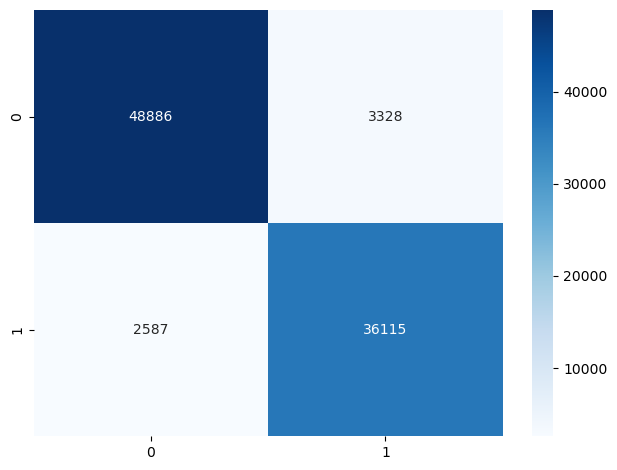

Test Confusion matrix


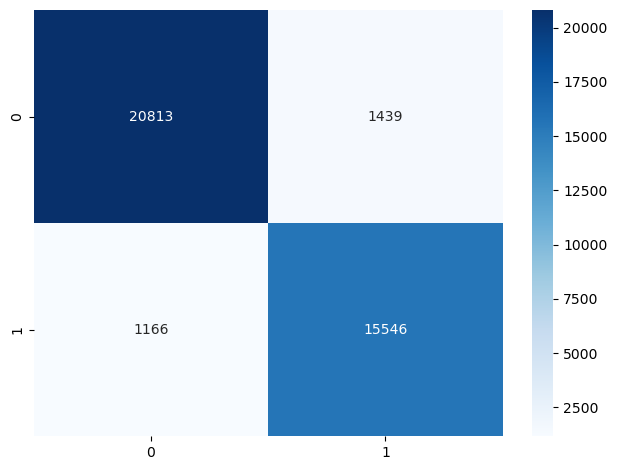

In [56]:
classifier_RF.fit(x_train,y_train)
y_train_pred = classifier_RF.predict(x_train)
y_test_pred = classifier_RF.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

# accounted for the overfitting